<a href="https://colab.research.google.com/github/manojboyapati/Manoj_Data690/blob/main/Assignment_05/Assignmennt_05_Part_025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment_05_Part_02

Name: Manoj

Date:03/05/2022

**Working** **with** **code**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

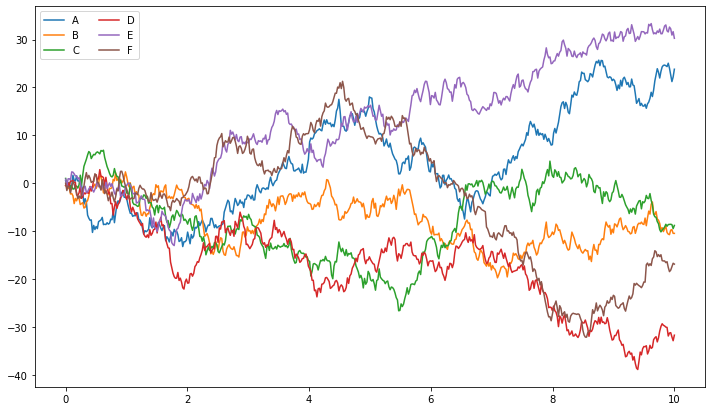

In [3]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

**Interacting** **with** **data**

In [4]:
import requests
import pandas as pd

In [5]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [6]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-02-26 20:54:17.434744')

In [7]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [8]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

**Bitcoin**

In [9]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-26 21:00:00,39269.54,39466.84,39250.00,39352.48,7.636992,3.005067e+05
2022-02-26 22:00:00,39350.19,39681.18,39316.86,39466.34,104.197572,4.121826e+06
2022-02-26 23:00:00,39483.63,39495.45,39090.94,39182.98,26.926009,1.057289e+06
2022-02-27 00:00:00,39159.91,39183.18,38938.99,39146.66,38.993970,1.522280e+06
2022-02-27 01:00:00,39146.66,39285.02,38741.67,38836.10,45.843886,1.785093e+06


In [10]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,169.000000,169.000000,169.000000,169.000000,169.000000,1.690000e+02
mean,41288.870237,41531.522663,41036.339467,41292.999941,90.895168,3.786048e+06
std,2290.427937,2311.148877,2276.035155,2289.809859,93.135628,3.932028e+06
min,37408.050000,37824.480000,37015.740000,37410.010000,4.595978,1.785289e+05
25%,39092.960000,39204.810000,38865.940000,39091.640000,28.690754,1.208434e+06
50%,41441.610000,41558.950000,41251.380000,41439.510000,53.465534,2.250032e+06
75%,43536.140000,43859.520000,43333.000000,43564.730000,112.331332,4.576964e+06
max,44858.140000,45332.380000,44454.990000,44822.340000,527.540571,2.270716e+07


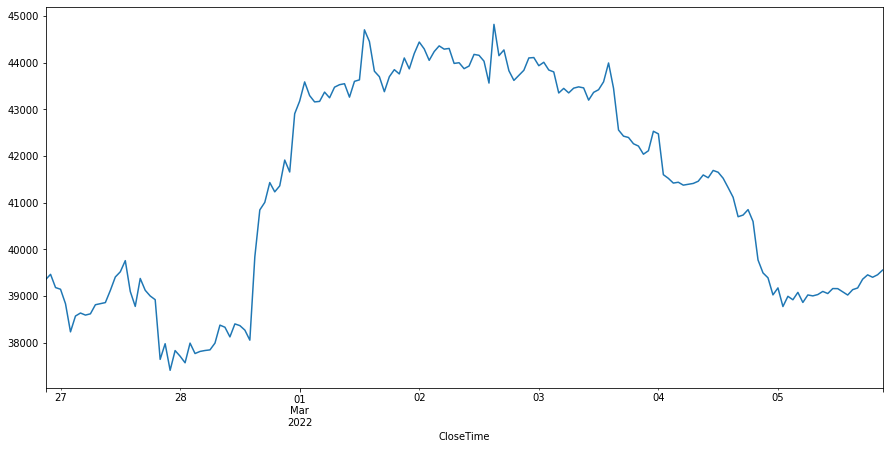

In [11]:
btc['ClosePrice'].plot(figsize=(15, 7))

**Ether**

In [12]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-26 21:00:00,2813.20,2835.51,2811.20,2826.72,248.011215,7.003279e+05
2022-02-26 22:00:00,2826.52,2857.42,2821.99,2826.89,403.102143,1.145857e+06
2022-02-26 23:00:00,2828.03,2829.48,2789.42,2796.25,324.217400,9.113860e+05
2022-02-27 00:00:00,2795.61,2796.44,2767.79,2779.62,356.004032,9.899095e+05
2022-02-27 01:00:00,2779.16,2791.41,2743.57,2752.57,156.051381,4.306093e+05


In [13]:
eth.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,169.000000,169.000000,169.000000,169.000000,169.000000,1.690000e+02
mean,2798.547929,2816.977692,2778.050533,2798.048343,514.874227,1.446875e+06
std,132.451073,134.177247,130.763700,132.673073,430.402713,1.204015e+06
min,2593.600000,2616.830000,2558.900000,2595.000000,60.764158,1.764648e+05
25%,2669.900000,2682.330000,2648.400000,2668.440000,215.601193,5.944111e+05
50%,2805.790000,2823.070000,2784.540000,2807.920000,397.054276,1.093390e+06
75%,2923.690000,2935.710000,2906.290000,2925.000000,648.892880,1.891372e+06
max,3020.000000,3045.710000,2991.440000,3020.540000,2283.844474,6.377381e+06


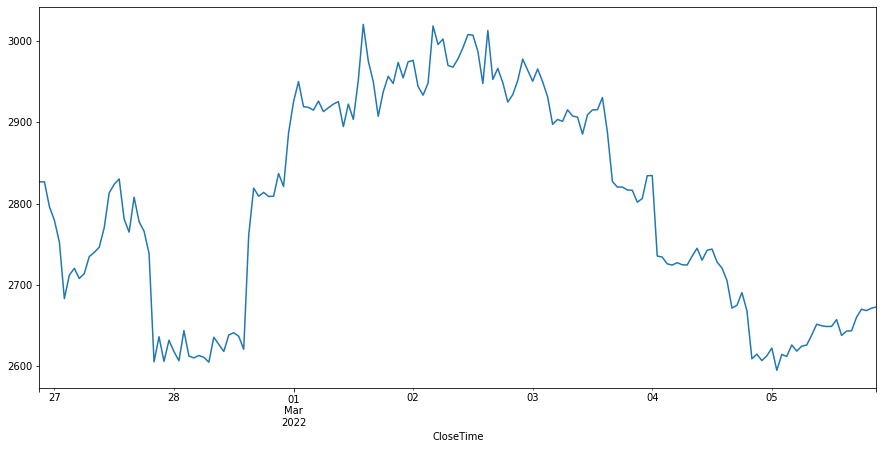

In [14]:
eth['ClosePrice'].plot(figsize=(15, 7))

In [15]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-26 21:00:00,2813.20,2835.51,2811.20,2826.72,248.011215,7.003279e+05
2022-02-26 22:00:00,2826.52,2857.42,2821.99,2826.89,403.102143,1.145857e+06
2022-02-26 23:00:00,2828.03,2829.48,2789.42,2796.25,324.217400,9.113860e+05
2022-02-27 00:00:00,2795.61,2796.44,2767.79,2779.62,356.004032,9.899095e+05
2022-02-27 01:00:00,2779.16,2791.41,2743.57,2752.57,156.051381,4.306093e+05


**Dynamic** **plots** **with** **Bokeh**

In [16]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [17]:
output_notebook()

In [18]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

**Exporting to Excel**

In [19]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [20]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [21]:
eth.to_excel(writer, sheet_name='Ether')

In [22]:
writer.save()